# Mini Programming Assignment: Implement a Quicksort Algorithm

**Name:** Ben Prescott

**Date:** 07/17/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

This notebook provides a comparison of execution speeds of three different sorting algorithms: quicksort, bubble sort, and insertion sort. Five different lists are created to contain a number of unique strings containing 50 characters each. The unique string counts for each list were 200, 400, 600, 800, and 1000, respectively. The reults of the execution times were then visualized with a bar and line chart. 

**Algorithm Explanation**

The algorithms used in this assignment were quicksort, bubble sort, and insertion sort. The three algorithms use "divide and conquer" methods, meaning that each break down the list or array into smaller and smaller problems until they can be solved without further breaking down. These results are then merged into the original problem to provide the desired output. 

Quicksort works by using a pivot value, which provides a partition point for values larger and smaller than the pivot. The larger/smaller values are then split out and a new pivot in each group is determined, further splitting the initial split pairs. This continues until no additional splits are needed, resulting in the necessary order of values to be merged back into the original problem. The worst case time complexity of quicksort is O($n^{2}$)

Insertion sort involves comparing the second value with the first, and if the second value is larger it shifts the first value up to make room for swapping the second value into the first value position. This process continues linearly through the values, comparing the next value with the previous values and moving larger values up to make room for inserting the smaller value, until the entire group is sorted. The time complexity of insertion sort is O($n^{2}$). 

Bubble sort works by (potentially) doing multiple sweeps over the elements, only reviewing two elements at a time and swapping them if they are in the incorrect order. This means that it wont look at previous elements to move a newly inspected element before, requiring it to review the elements multiple times. Bubble sort's worst case is O($n^{2}$), resulting from an array that would be reverse sorted, causing many sweeps over the elements to move them to the correct order. 

**Approach**

Five lists of randomly generated strings were created, with each string being 50 characters in length. The arrays were named strings_200, strings_400, strings_600, strings_800, and strings_1000 to describe the count of 50-character long strings - 200, 400, 600, 800, and 1000 strings respectively. These lists were then passed through a basic for loop to verify no strings were duplicates. 

Each list of strings was then sorted using the three different sorting algorithms, recording the time taken to sort for later review. The quicksort algorithm used in this assignment does not modify the list passed to the algorithm, but returns a sorted version of it. However, both bubble sort and insertion sort do modify the passed list, which required copies of the original lists to be created to ensure the algorithms weren't given an already sorted list. 

The logged execution times were then plotted on a bar chart and line chart, to help visualize each algorithm's execution time by list size. 

**Results**

All three algorithms have a worst case time complexity of O($n^{2}$); however, quicksort shows negligible increases in execution time in comparison to bubble sort and insertion sort. However, quicksort's average case is O($n log(n)$), which helps to explain why the algorithm is noticably faster than the other two. Both bubble sort and insertion sort are still O($n^{2}$) on an average case.

The results for our specific lists show that insertion sort is about twice as fast as bubble sort across all list lengths. Quicksort is shown to be about seven times faster than bubble sort on the list of 200 strings, and nearly 53 times faster on the list of 1,000 strings. This indicates that quicksort is still significantly faster than the other two algorithms compared in this assignment. 

In [1]:
import numpy as np
import pandas as pd
import string
import random
import gc
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Generating Lists of Strings & Checking Duplicates

In [3]:
# Creating five lists of randomly generated strings of length 50
strings_200 = [''.join(random.choices(string.ascii_letters, k = 50)) for i in range(200)]
strings_400 = [''.join(random.choices(string.ascii_letters, k = 50)) for i in range(400)]
strings_600 = [''.join(random.choices(string.ascii_letters, k = 50)) for i in range(600)]
strings_800 = [''.join(random.choices(string.ascii_letters, k = 50)) for i in range(800)]
strings_1000 = [''.join(random.choices(string.ascii_letters, k = 50)) for i in range(1000)]

In [4]:
# Checking if duplicates exist in each list
for l in [strings_200, strings_400, strings_600, strings_800, strings_1000]:
    if len(l) == len(set(l)):
        print('no duplicates found')
    else:
        print('duplicates found!')

no duplicates found
no duplicates found
no duplicates found
no duplicates found
no duplicates found


## Quicksort Execution Times

In [5]:
def quicksort(array):
    if len(array) < 2:
        # base case, arrays with 0 or 1 element are already "sorted"
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all the elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


In [6]:
# Creating an empty list to store values for quicksort execution times
quicksort_times = [] 
gc.collect() # Freeing variables from memory to provide clean slate for performance

70

In [7]:
# Sorting the lists and recording their sort times

start = timer()
out = quicksort(strings_200)
end = timer()
quicksort_times.append(end-start)

start = timer()
out = quicksort(strings_400)
end = timer()
quicksort_times.append(end-start)

start = timer()
out = quicksort(strings_600)
end = timer()
quicksort_times.append(end-start)

start = timer()
out = quicksort(strings_800)
end = timer()
quicksort_times.append(end-start)

start = timer()
out = quicksort(strings_1000)
end = timer()
quicksort_times.append(end-start)

In [8]:
quicksort_times

[0.0008407999999988647,
 0.0017101999999979967,
 0.002338999999999203,
 0.0030978000000061456,
 0.00389820000000185]

## Bubble Sort Execution Times

In [9]:
def bubbleSort(arr):
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [18]:
# Creating an empty list to store values for bubble sort execution times
bubblesort_times = []
gc.collect()

1450

In [19]:
# Making copies of the original lists as bubble sort will modify the input list
strings_200_bubble = strings_200.copy()
strings_400_bubble = strings_400.copy()
strings_600_bubble = strings_600.copy()
strings_800_bubble = strings_800.copy()
strings_1000_bubble = strings_1000.copy()

In [20]:
# Sorting the lists and recording their sort times
start = timer()
out = bubbleSort(strings_200_bubble)
end = timer()
bubblesort_times.append(end-start)

start = timer()
out = bubbleSort(strings_400_bubble)
end = timer()
bubblesort_times.append(end-start)

start = timer()
out = bubbleSort(strings_600_bubble)
end = timer()
bubblesort_times.append(end-start)

start = timer()
out = bubbleSort(strings_800_bubble)
end = timer()
bubblesort_times.append(end-start)

start = timer()
out = bubbleSort(strings_1000_bubble)
end = timer()
bubblesort_times.append(end-start)

In [21]:
bubblesort_times

[0.005875599999995984,
 0.03105160000001206,
 0.0729825999999889,
 0.10860450000001265,
 0.20509839999999713]

## Insertion Sort Execution Times

In [25]:
def insertionSort(arr):
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):

        key = arr[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

In [32]:
# Creating an empty list to store values for insertion sort execution times
insertionsort_times = []
gc.collect()

4277

In [33]:
# Making copies of the original lists as insertion sort will modify the input list
strings_200_insertion = strings_200.copy()
strings_400_insertion = strings_400.copy()
strings_600_insertion = strings_600.copy()
strings_800_insertion = strings_800.copy()
strings_1000_insertion = strings_1000.copy()

In [34]:
# Sorting the lists and recording their sort times
start = timer()
out = insertionSort(strings_200_insertion)
end = timer()
insertionsort_times.append(end-start)

start = timer()
out = insertionSort(strings_400_insertion)
end = timer()
insertionsort_times.append(end-start)

start = timer()
out = insertionSort(strings_600_insertion)
end = timer()
insertionsort_times.append(end-start)

start = timer()
out = insertionSort(strings_800_insertion)
end = timer()
insertionsort_times.append(end-start)

start = timer()
out = insertionSort(strings_1000_insertion)
end = timer()
insertionsort_times.append(end-start)

In [35]:
insertionsort_times

[0.0027414999999564316,
 0.011269599999991442,
 0.03126129999998284,
 0.05599610000001576,
 0.09991009999998823]

## Comparison Table & Graphs

In [41]:
# Creating a Pandas DataFrame for table reference
pd.set_option("display.precision", 10)
results = pd.DataFrame(index=['strings_200','strings_400','strings_600','strings_800','strings_1000'])
results.index.rename('list_name', inplace=True)
results['list_length'] = [len(i) for i in [strings_200,strings_400,strings_600,strings_800,strings_1000]]
results['quicksort_times'] = quicksort_times
results['insertionsort_times'] = insertionsort_times
results['bubblesort_times'] = bubblesort_times
results

,list_length,quicksort_times,insertionsort_times,bubblesort_times
list_name,,,,
strings_200,200,0.0008408,0.0027415,0.0058756
strings_400,400,0.0017102,0.0112696,0.0310516
strings_600,600,0.0023390,0.0312613,0.0729826
strings_800,800,0.0030978,0.0559961,0.1086045
strings_1000,1000,0.0038982,0.0999101,0.2050984


[Text(0, 0, '200'),
 Text(1, 0, '400'),
 Text(2, 0, '600'),
 Text(3, 0, '800'),
 Text(4, 0, '1000')]

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'List Length')

Text(0, 0.5, 'Execution Time')

([<matplotlib.axis.XTick at 0x2101115e4f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Sorting Algorithm Execution Times - Line Chart')

[]

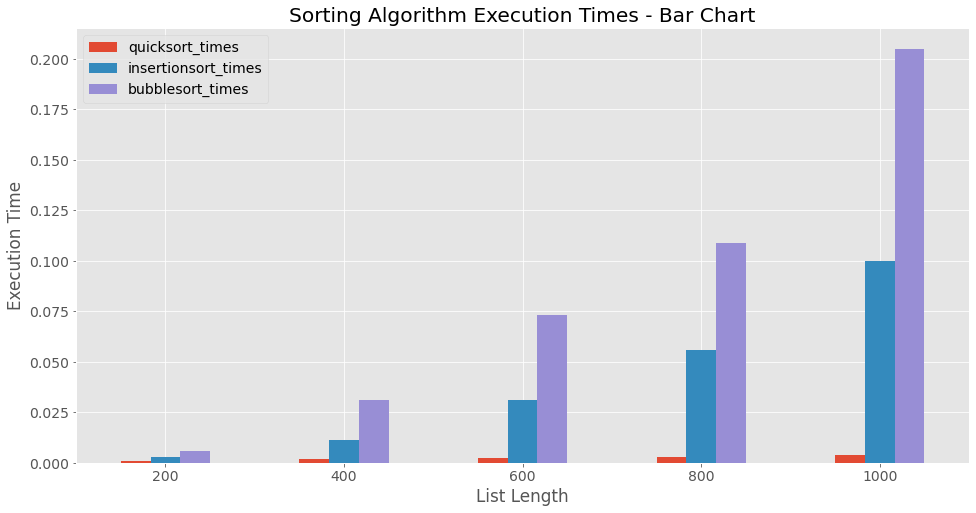

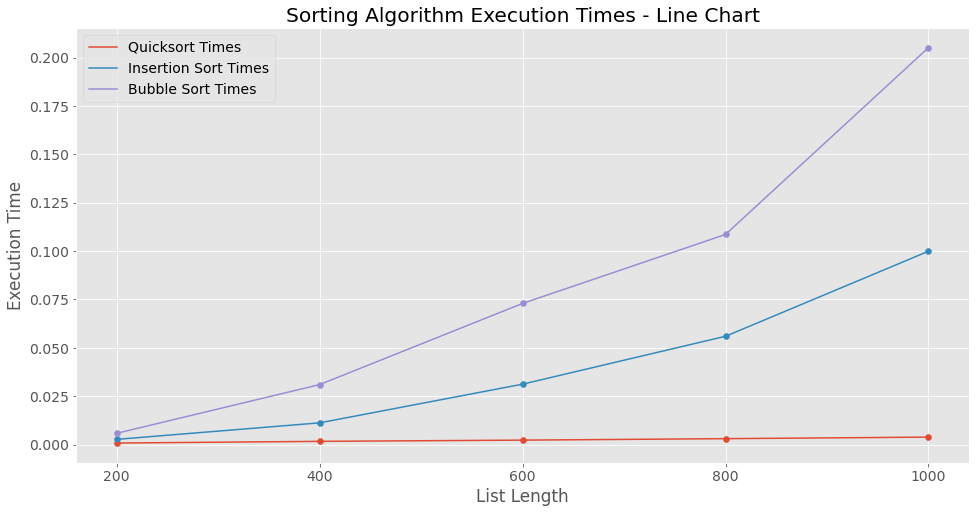

In [43]:
# Creating two plots for different views/perspectives: 1 - bar graph, 2 - line graph. 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

results.iloc[:,1:].plot(kind='bar',
                        xlabel='List Length',
                        ylabel='Execution Time',
                        figsize=(16,8),
                        fontsize=14,
                        title='Sorting Algorithm Execution Times - Bar Chart',
                        rot=0).set_xticklabels(results.list_length)

plt.figure(figsize=(16,8))
plt.plot(results.list_length, results.quicksort_times, label='Quicksort Times')
plt.scatter(results.list_length, results.quicksort_times)
plt.plot(results.list_length, results.insertionsort_times, label='Insertion Sort Times')
plt.scatter(results.list_length, results.insertionsort_times)
plt.plot(results.list_length, results.bubblesort_times, label='Bubble Sort Times')
plt.scatter(results.list_length, results.bubblesort_times)
plt.xlabel('List Length')
plt.ylabel('Execution Time')
plt.xticks(results.list_length)
plt.title('Sorting Algorithm Execution Times - Line Chart')
plt.legend()
plt.plot()